Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import sin, cos, tan
from sympy import *
from scipy.optimize import minimize
%matplotlib inline

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [3]:
from sklearn.metrics.pairwise import cosine_similarity    

In [4]:
raitings_cos = cosine_similarity(raitings)
raitings_cos 

array([[1.        , 0.82602919, 0.84921529, 0.78340116, 0.81917632,
        0.74118548, 0.72735828, 0.80967522, 0.91065982, 0.86010776],
       [0.82602919, 1.        , 0.81234325, 0.84635337, 0.87138052,
        0.82713107, 0.82629684, 0.80026003, 0.82526308, 0.81968127],
       [0.84921529, 0.81234325, 1.        , 0.84669374, 0.78394299,
        0.79097985, 0.67616223, 0.76289552, 0.82112077, 0.91873051],
       [0.78340116, 0.84635337, 0.84669374, 1.        , 0.69153409,
        0.78665792, 0.83274211, 0.82934667, 0.7770666 , 0.8588687 ],
       [0.81917632, 0.87138052, 0.78394299, 0.69153409, 1.        ,
        0.7764434 , 0.78200468, 0.81236869, 0.87948477, 0.84574789],
       [0.74118548, 0.82713107, 0.79097985, 0.78665792, 0.7764434 ,
        1.        , 0.74011801, 0.84451685, 0.80622876, 0.85514908],
       [0.72735828, 0.82629684, 0.67616223, 0.83274211, 0.78200468,
        0.74011801, 1.        , 0.82669174, 0.81130044, 0.79154718],
       [0.80967522, 0.80026003, 0.7628955

In [5]:
i = 0
for row in raitings_cos:
    row[i] = 0
    i += 1
print(raitings_cos)

[[0.         0.82602919 0.84921529 0.78340116 0.81917632 0.74118548
  0.72735828 0.80967522 0.91065982 0.86010776]
 [0.82602919 0.         0.81234325 0.84635337 0.87138052 0.82713107
  0.82629684 0.80026003 0.82526308 0.81968127]
 [0.84921529 0.81234325 0.         0.84669374 0.78394299 0.79097985
  0.67616223 0.76289552 0.82112077 0.91873051]
 [0.78340116 0.84635337 0.84669374 0.         0.69153409 0.78665792
  0.83274211 0.82934667 0.7770666  0.8588687 ]
 [0.81917632 0.87138052 0.78394299 0.69153409 0.         0.7764434
  0.78200468 0.81236869 0.87948477 0.84574789]
 [0.74118548 0.82713107 0.79097985 0.78665792 0.7764434  0.
  0.74011801 0.84451685 0.80622876 0.85514908]
 [0.72735828 0.82629684 0.67616223 0.83274211 0.78200468 0.74011801
  0.         0.82669174 0.81130044 0.79154718]
 [0.80967522 0.80026003 0.76289552 0.82934667 0.81236869 0.84451685
  0.82669174 0.         0.7981276  0.83682229]
 [0.91065982 0.82526308 0.82112077 0.7770666  0.87948477 0.80622876
  0.81130044 0.798127

In [15]:
string = np.arange(len(raitings_cos))
column = np.argmax(raitings_cos, axis=1)
x = zip(string, column)
y = list(x)
print(y)

[(0, 8), (1, 4), (2, 9), (3, 9), (4, 8), (5, 9), (6, 3), (7, 5), (8, 0), (9, 2)]


Во втором подзадании можно использовать TruncatedSVD или linalg.diagsvd

In [3]:
from scipy import linalg

In [4]:
print(raitings.size)

150


In [5]:
X = np.resize(raitings, (10, 5))

In [6]:
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])

Задание 2
Вычислите производную tg^2(sin(x) + cos(2x+3)) в точке x_0 = 1 на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [5]:
x = symbols('x')

In [10]:
fx1 = diff(tan(sin(x)+cos(2*x+3))**2)
fx1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [11]:
fx1.evalf(subs = {'x' : 1})

55.3859176353379

Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

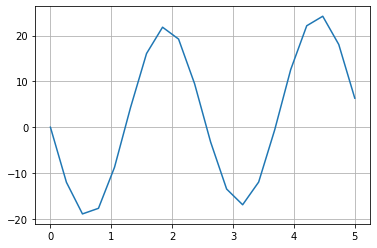

In [5]:
plt.plot(x, fx)
plt.grid()
plt.show()

In [6]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [9]:
result = minimize(error, (0, 5), method = 'COBYLA')
result

     fun: 243.6852395719506
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 31
  status: 1
 success: True
       x: array([1.05774623, 5.12280637])

Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [27]:
from numpy.random import choice
from scipy.stats import *

In [25]:
a = np.random.random(20)
a

array([0.74893578, 0.17550365, 0.80426759, 0.49963496, 0.75629175,
       0.15829446, 0.06030642, 0.15990067, 0.4612071 , 0.93498515,
       0.19897007, 0.37826301, 0.25892809, 0.08108029, 0.20495148,
       0.45906119, 0.26115592, 0.6281966 , 0.25344999, 0.10650512])

In [28]:
a1 = choice(a, size=50)
a1

array([0.93498515, 0.08108029, 0.6281966 , 0.93498515, 0.15990067,
       0.75629175, 0.6281966 , 0.06030642, 0.15990067, 0.17550365,
       0.10650512, 0.74893578, 0.19897007, 0.80426759, 0.80426759,
       0.37826301, 0.93498515, 0.37826301, 0.80426759, 0.26115592,
       0.10650512, 0.4612071 , 0.08108029, 0.75629175, 0.19897007,
       0.20495148, 0.75629175, 0.06030642, 0.25892809, 0.37826301,
       0.15829446, 0.4612071 , 0.15829446, 0.15829446, 0.25892809,
       0.93498515, 0.10650512, 0.37826301, 0.25892809, 0.37826301,
       0.4612071 , 0.6281966 , 0.25892809, 0.25892809, 0.37826301,
       0.17550365, 0.08108029, 0.75629175, 0.10650512, 0.4612071 ])

In [30]:
a2 = choice(a, size=(1000, 50))

In [31]:
import statistics

In [34]:
a2_mean = []
for string in a2:
    a2_mean.append(statistics.mean(string))


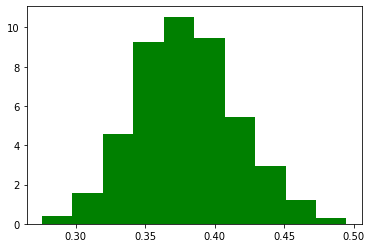

In [35]:
plt.hist(a2_mean, density=True, color='Green')
plt.show()

Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

In [4]:
z = np.array([[1, 4], [1, 1]])
z

array([[1, 4],
       [1, 1]])

In [3]:
from numpy import linalg

In [5]:
w, v = linalg.eig(z)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
